In [1]:
import numpy as np
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration
import deconv as d
import graphics as g
import metrics as m

astro = color.rgb2gray(data.astronaut())

np.random.seed(seed=0)

psf = np.ones((5, 5)) / 25
astro_blurred = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro_blurred.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

## Ричардсон-Люси

### ssim

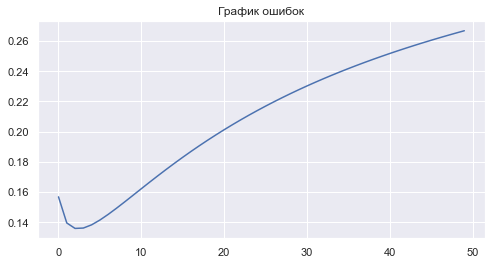

ssim между изначальным и повреждённым    = 0.1735442157971933
ssim между изначальным и восстановленным = 0.1358891483510688
0.1358891483510688


In [4]:
ssim_list = []
n = []
ests = d.richardson_lucy(astro_noisy, psf, init='ones', iterations=50)
for i, est in enumerate(ests):
    ssim_list.append(m.ssim(astro, est))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n, ssim_list, title='График ошибок')
ests = d.richardson_lucy(astro_noisy, psf, iterations=np.argmin(ssim_list)+1)
for est2 in ests:
    pass
print('ssim между изначальным и повреждённым    =', m.ssim(astro, astro_noisy))
print('ssim между изначальным и восстановленным =', m.ssim(astro, est2))
print(np.min(ssim_list))

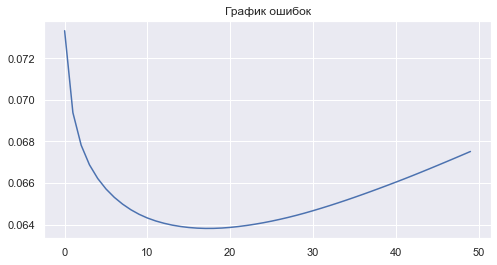

MAE между изначльным и повреждённым    = 0.07017723373098039
MAE между изначльным и восстановленным = 0.06381627239047051


In [6]:
mae_list = []
n = []
ests = d.richardson_lucy(astro_noisy, psf, init='ones', iterations=50)
for i, est in enumerate(ests):
    mae_list.append(m.MAE(astro, est, n=100))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n, mae_list, title='График ошибок')
ests = d.richardson_lucy(astro_noisy, psf, iterations=np.argmin(mae_list)+1)
for est2 in ests:
    pass
print('MAE между изначльным и повреждённым    =', m.MAE(astro, astro_noisy, n=100))
print('MAE между изначльным и восстановленным =', m.MAE(astro, est2, n=100))

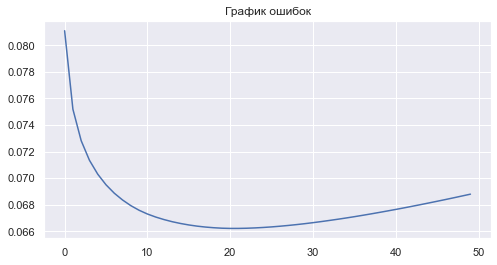

0.06621683404554685
MAE между изначльным и повреждённым    = 0.07636989399529412
MAE между изначльным и восстановленным = 0.06621683404554685


In [28]:
mae_list = []
n = []
ests = d.richardson_lucy(astro_noisy, psf, init='ones', iterations=50)
for i, est in enumerate(ests):
    mae_list.append(m.MAE(astro, est, n=50))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n, mae_list, title='График ошибок')
print(np.min(mae_list))

ests = d.richardson_lucy(astro_noisy, psf, iterations=np.argmin(mae_list)+1)
for est2 in ests:
    pass
print('MAE между изначльным и повреждённым    =', m.MAE(astro, astro_noisy, n=50))
print('MAE между изначльным и восстановленным =', m.MAE(astro, est2, n=50))

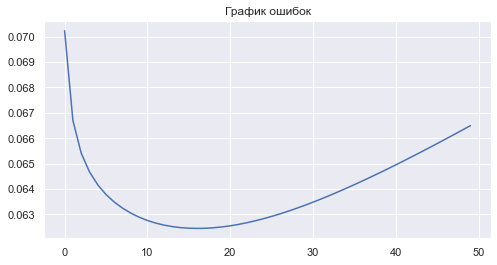

0.06244577557780988
MAE между изначльным и повреждённым    = 0.06803366775588236
MAE между изначльным и восстановленным = 0.06244577557780988


In [7]:
mae_list = []
n = []
ests = d.richardson_lucy(astro_noisy, psf, init='ones', iterations=50)
for i, est in enumerate(ests):
    mae_list.append(m.MAE(astro, est, n=200))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n, mae_list, title='График ошибок')
print(np.min(mae_list))
ests = d.richardson_lucy(astro_noisy, psf, iterations=np.argmin(mae_list)+1)
for est2 in ests:
    pass
print('MAE между изначльным и повреждённым    =', m.MAE(astro, astro_noisy, n=200))
print('MAE между изначльным и восстановленным =', m.MAE(astro, est2, n=200))

## Винер

In [29]:
metr = m.MAE
metr1 = 'MAE'
wien = d.wiener(astro_noisy, psf)
wien.optimize(astro, metric = metr, n = 50)
est2 = wien.recover_image()
print(metr1, 'между изначльным и повреждённым    =', metr(astro, astro_noisy, n = 50))
print(metr1, 'между изначльным и восстановленным =', metr(astro, est2, n = 50))

MAE между изначльным и повреждённым    = 0.07636989399529412
MAE между изначльным и восстановленным = 0.08733744716096535


In [30]:
metr = m.MAE
metr1 = 'MAE'
wien = d.wiener(astro_noisy, psf)
wien.optimize(astro, metric = metr, n = 100)
est2 = wien.recover_image()
print(metr1, 'между изначльным и повреждённым    =', metr(astro, astro_noisy, n = 100))
print(metr1, 'между изначльным и восстановленным =', metr(astro, est2, n = 100))

MAE между изначльным и повреждённым    = 0.07017723373098039
MAE между изначльным и восстановленным = 0.06610581841742942


In [31]:
metr = m.MAE
metr1 = 'MAE'
wien = d.wiener(astro_noisy, psf)
wien.optimize(astro, metric = metr, n = 200)
est2 = wien.recover_image()
print(metr1, 'между изначльным и повреждённым    =', metr(astro, astro_noisy, n = 200))
print(metr1, 'между изначльным и восстановленным =', metr(astro, est2, n = 200))

MAE между изначльным и повреждённым    = 0.06803366775588236
MAE между изначльным и восстановленным = 0.06702590321366853


In [33]:
metr = m.ssim
metr1 = 'SSIM'
wien = d.wiener(astro_noisy, psf)
wien.optimize(astro, metric = metr)
est2 = wien.recover_image()
print(metr1, 'между изначльным и повреждённым    =', metr(astro, astro_noisy))
print(metr1, 'между изначльным и восстановленным =', metr(astro, est2))

SSIM между изначльным и повреждённым    = 0.1735442157971933
SSIM между изначльным и восстановленным = 0.22568925778705834


## Тихонов

In [36]:
metr = m.MAE
metr1 = 'SSIM'
tykh = d.tykhonov(astro_noisy, psf)
tykh.optimize(astro, metric = metr, n = 50)
est2 = tykh.recover_image()
print(metr1, 'между изначльным и повреждённым    =', metr(astro, astro_noisy, n = 50))
print(metr1, 'между изначльным и восстановленным =', metr(astro, est2, n = 50))

SSIM между изначльным и повреждённым    = 0.07636989399529412
SSIM между изначльным и восстановленным = 0.10067457232583588


In [37]:
metr = m.MAE
metr1 = 'SSIM'
tykh = d.tykhonov(astro_noisy, psf)
tykh.optimize(astro, metric = metr, n = 100)
est2 = tykh.recover_image()
print(metr1, 'между изначльным и повреждённым    =', metr(astro, astro_noisy, n = 100))
print(metr1, 'между изначльным и восстановленным =', metr(astro, est2, n = 100))

SSIM между изначльным и повреждённым    = 0.07017723373098039
SSIM между изначльным и восстановленным = 0.08404752582850022


In [38]:
metr = m.MAE
metr1 = 'SSIM'
tykh = d.tykhonov(astro_noisy, psf)
tykh.optimize(astro, metric = metr, n = 200)
est2 = tykh.recover_image()
print(metr1, 'между изначльным и повреждённым    =', metr(astro, astro_noisy, n = 200))
print(metr1, 'между изначльным и восстановленным =', metr(astro, est2, n = 200))

SSIM между изначльным и повреждённым    = 0.06803366775588236
SSIM между изначльным и восстановленным = 0.08406788897419065


In [39]:
metr = m.ssim
metr1 = 'SSIM'
tykh = d.tykhonov(astro_noisy, psf)
tykh.optimize(astro, metric = metr)
est2 = tykh.recover_image()
print(metr1, 'между изначльным и повреждённым    =', metr(astro, astro_noisy))
print(metr1, 'между изначльным и восстановленным =', metr(astro, est2))

SSIM между изначльным и повреждённым    = 0.1735442157971933
SSIM между изначльным и восстановленным = 0.20877285841621235


## Время

In [ ]:
time_list = []
n = []
k = 0.05/100
for i in range(150,250):
    time = m.time_of_work(d.wiener, image = astro_noisy, psf = psf, p=i*k)
    time_list.append(time)

time_list = np.asarray(time_list)
print('Среднее время обработки одного изображения ', np.round(time_list.mean(), 3), 'c')

In [ ]:
time_list = []
n = []
k = 0.05/100
for i in range(150,250):
    time = m.time_of_work(d.tykhonov, image = astro_noisy, psf = psf, gamma=i*k)
    time_list.append(time)

time_list = np.asarray(time_list)
print('Среднее время обработки одного изображения тихоновской регуляризацией', np.round(time_list.mean(), 3), 'c')

In [ ]:
import time
ests = d.richrdson_lucy(astro_noisy, psf, iterations=100)
start_time = time.time()
for i, est in enumerate(ests):
    pass
time1 = (time.time() - start_time)/100

print('Среднее время обработки одного изображения методом Люси-Ричардсона', np.round(time1, 3), 'c')